# Gambler's Problem as a Markov Decision Process (MDP)

## Problem Definition

A gambler begins with an initial capital (dollars) $s \in \{1, 2, ..., 99\}$. The goal is to reach a terminal state of $100$ dollars before reaching a terminal state of $0$ dollars.

At each step, the gambler can bet an integer amount $a$ such that $a \in \{1, 2, ..., \min(s, 100 - s)\}$. The coin used for betting is imbalanced, with a probability of $0.4$ for landing on heads and $0.6$ for landing on tails.

If the coin lands on heads when the gambler places a bet, his capital will increase by the amount he bet. Conversely, if the coin lands on tails, he will lose the amount he bet from his capital.

The game terminates if the gambler reaches either $0$ dollars or $100$ dollars. The only reward in this problem is $1$ unit of reward when the gambler reaches the terminal state with $100$ dollars.

## MDP Formulation

- **States (S)**: Each state corresponds to the gambler's capital. It can be any integer value $s \in \{0, 1, 2, ..., 100\}$. The terminal states are $0$ dollars and $100$ dollars.

- **Actions (A)**: The actions correspond to the possible bets. At any given state $s$, the gambler can bet any amount $a \in \{1, 2, ..., \min(s, 100 - s)\}$.

- **Transition Probabilities (P)**: Given a state $s$ and an action $a$, the state at the next time step will be $s' = s + a$ with probability $0.4$ (if the coin lands on heads) and $s' = s - a$ with probability $0.6$ (if the coin lands on tails). Formally, we can represent this as $P(s' | s, a) = 0.4$ if $s' = s + a$ and $P(s' | s, a) = 0.6$ if $s' = s - a$.

- **Rewards (R)**: The only reward in this problem is $1$ unit of reward when the gambler reaches the terminal state with $100$ dollars. There are no other rewards associated with other states or actions. Formally, we can represent this as $R(s, a, s') = 1$ if $s' = 100$ and $R(s, a, s') = 0$ otherwise.

## Problem Solution

The problem can be solved using a form of value iteration or policy iteration algorithm to find the optimal policy $\pi^*$ that maximizes the probability of reaching the terminal state with $100$ dollars before reaching $0$ dollars.

The **Value Iteration** algorithm can be described as follows:

1. Initialize value function $V(s)$ arbitrarily. For all $s \in \{1, 2, ..., 99\}$, let $V(s) = 0$.

2. Repeat until $V(s)$ converges:

    - For each state $s \in \{1, 2, ..., 99\}$:
    
        - For each action $a \in \{1, 2, ..., \min(s, 100 - s)\}$:
        
            - Compute $Q(s, a)$ using the following formula:
            
                $$
                Q(s, a) = P(s + a | s, a) \cdot (R(s, a, s + a) + V(s + a)) + P(s - a | s, a) \cdot (R(s, a, s - a) + V(s - a))
                $$
                
            - Update $V(s)$ as $V(s) = \max_{a} Q(s, a)$.

3. Derive the policy $\pi^*$ from the optimal value function. For each state $s$, choose the action $a$ that maximizes the expected reward, i.e., $\pi^*(s) = \arg\max_{a} Q(s, a)$.

Here, $V(s)$ is the state-value function, $\pi^*(s)$ is the optimal policy, $Q(s, a)$ is the action-value function, $P(s' | s, a)$ is the transition probability, and $R(s, a, s')$ is the reward.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#resize charts to fit screen if using Jupyter Notebook
plt.rcParams['figure.figsize']=[20,5]

In [23]:
p_heads = 0.4
p_tails = 0.6
goal = 100
states = np.arange(goal+1)

In [24]:
value_function = np.zeros(goal+1)
policy = np.zeros(goal+1)

In [29]:
while True:
    delta = 0
    for s in states[1:goal]:  # iterate over all states except terminal states
        actions = np.arange(min(s, goal-s)+1)  # possible actions
        v = np.zeros(len(actions))  # to store values for each action
        for a in actions:
            v[a] = p_heads * ((s+a == goal) + value_function[s+a] * (s+a < goal)) \
                + p_tails * value_function[s-a]  # value for action a
        value_function[s] = np.max(v)  # update value function
        policy[s] = np.argmax(v)  # update policy
        delta = max(delta, abs(value_function[s] - v[np.argmax(v)]))  # calculate delta
    if delta < 1e-20:  # convergence criteria
        break

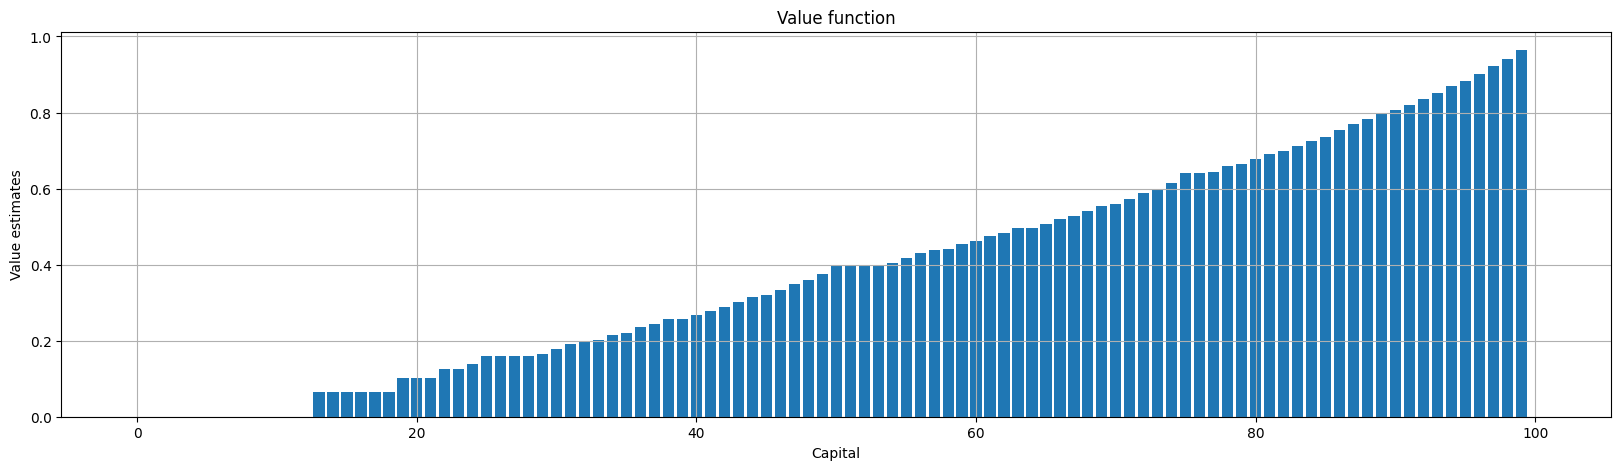

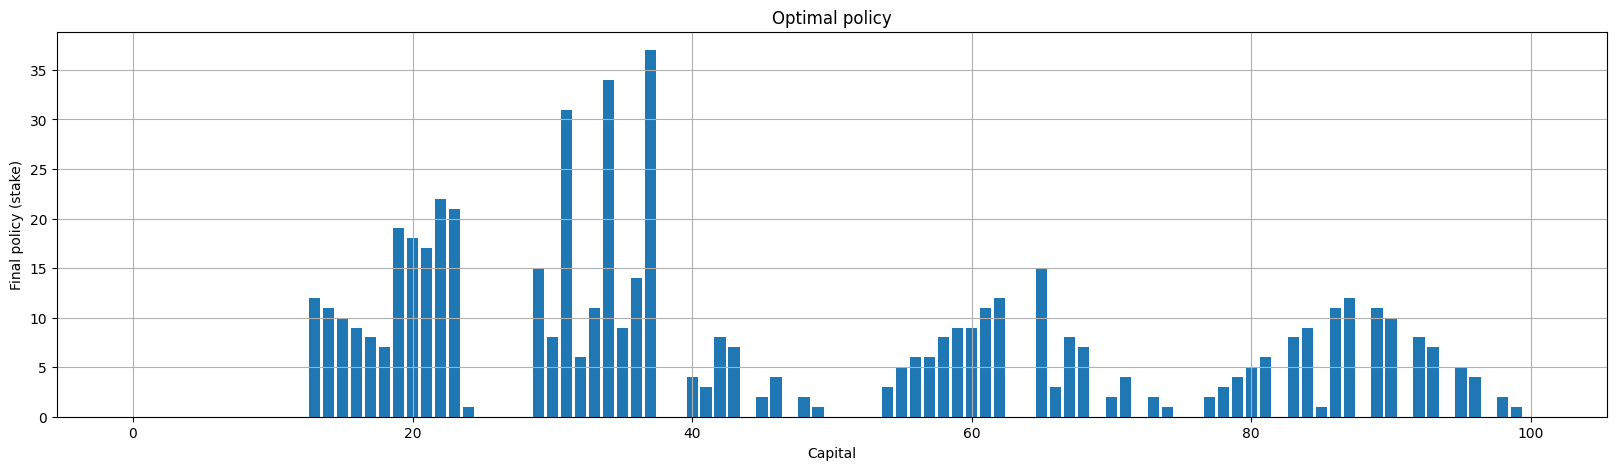

In [30]:
plt.bar(states, value_function, align='center')
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.title('Value function')
plt.grid(True)
plt.show()

plt.bar(states, policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title('Optimal policy')
plt.grid(True)
plt.show()

In [31]:
iteration = 0
convergence_threshold = 1e-20

while True:
    delta = 0
    for s in states[1:goal]:  # iterate over all states except terminal states
        old_v = value_function[s]
        actions = np.arange(min(s, goal-s)+1)  # possible actions
        v = np.zeros(len(actions))  # to store values for each action
        for a in actions:
            v[a] = p_heads * ((s+a == goal) + value_function[s+a] * (s+a < goal)) \
                    + p_tails * value_function[s-a]  # value for action a
        value_function[s] = np.max(v)  # update value function
        delta = max(delta, abs(old_v - value_function[s]))  # calculate delta

    iteration += 1
    print(f"Iteration: {iteration}, Delta: {delta}")

    if delta < convergence_threshold:  # convergence criteria
        break

for s in states[1:goal]:  # iterate over all states except terminal states
    actions = np.arange(min(s, goal-s)+1)  # possible actions
    v = np.zeros(len(actions))  # to store values for each action
    for a in actions:
        v[a] = p_heads * ((s+a == goal) + value_function[s+a] * (s+a < goal)) \
                + p_tails * value_function[s-a]  # value for action a
    policy[s] = np.argmax(v)  # update policy

Iteration: 1, Delta: 0.05570560000000002
Iteration: 2, Delta: 0.02228224000000001
Iteration: 3, Delta: 0.008912896000000003
Iteration: 4, Delta: 0.0016384000000000008
Iteration: 5, Delta: 0.0003932160000000005
Iteration: 6, Delta: 7.602595430399994e-05
Iteration: 7, Delta: 3.041038172160032e-05
Iteration: 8, Delta: 2.6418075402233343e-06
Iteration: 9, Delta: 9.045549017728909e-07
Iteration: 10, Delta: 7.815354352569415e-08
Iteration: 11, Delta: 1.8756850440893036e-08
Iteration: 12, Delta: 5.230363003816407e-09
Iteration: 13, Delta: 1.869841788348925e-09
Iteration: 14, Delta: 7.479367151660976e-10
Iteration: 15, Delta: 1.8698417900836484e-10
Iteration: 16, Delta: 4.8203025772297625e-11
Iteration: 17, Delta: 1.928121030891905e-11
Iteration: 18, Delta: 1.6749952119754496e-12
Iteration: 19, Delta: 5.735177957544302e-13
Iteration: 20, Delta: 4.955064136780152e-14
Iteration: 21, Delta: 1.189326415129699e-14
Iteration: 22, Delta: 3.3150565625916784e-15
Iteration: 23, Delta: 1.1839487723541708

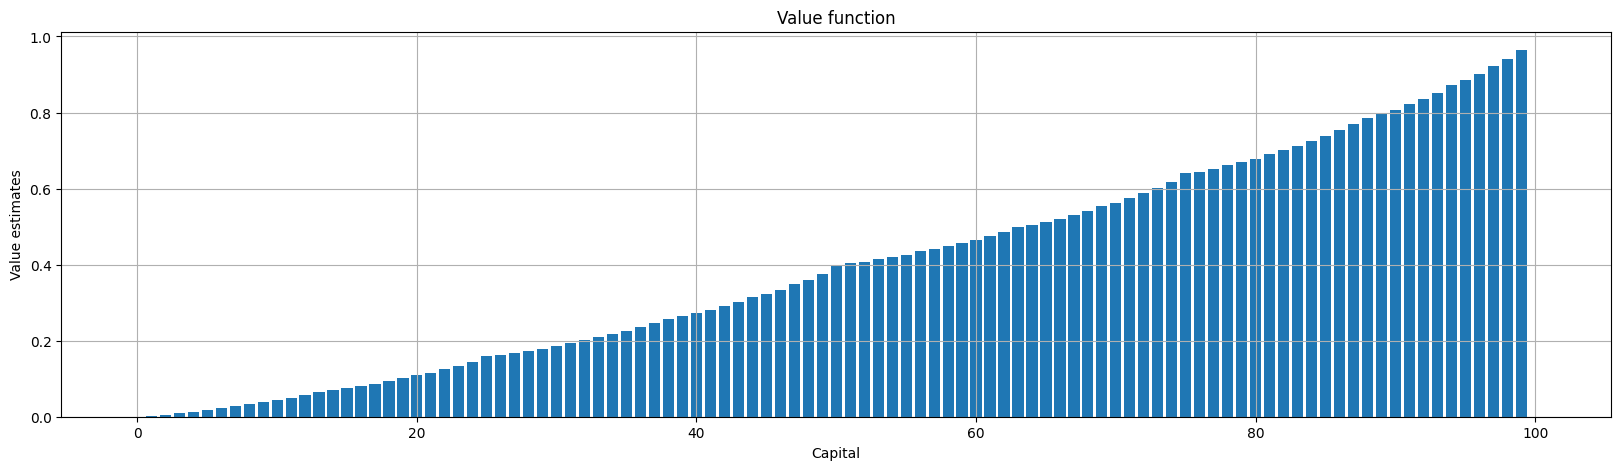

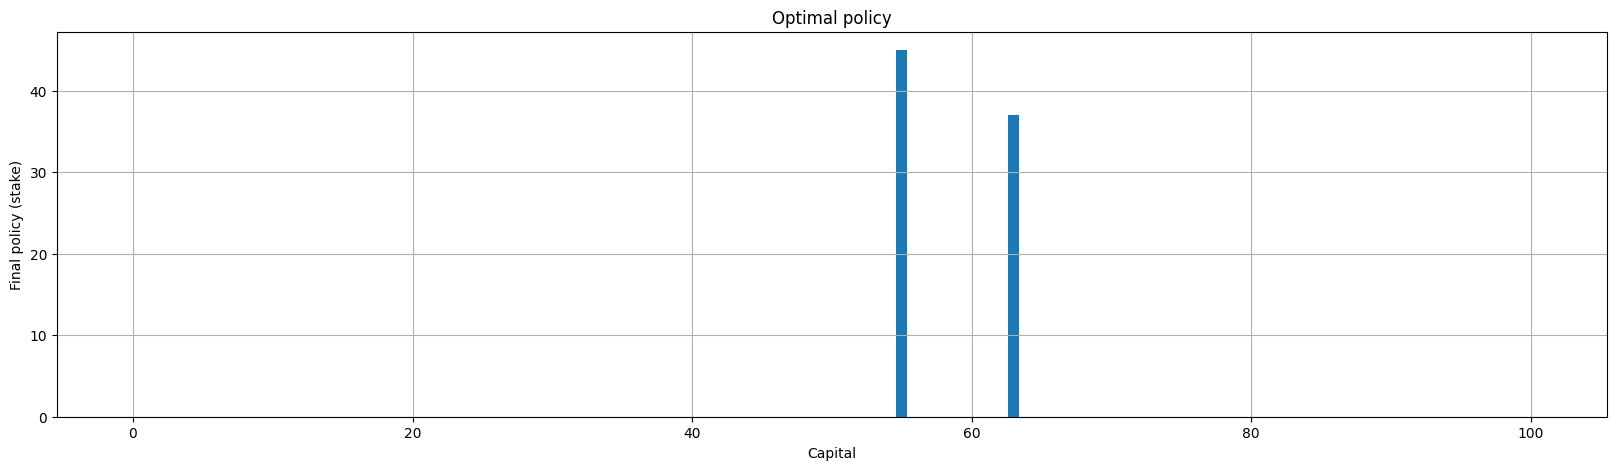

In [32]:
plt.bar(states, value_function, align='center')
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.title('Value function')
plt.grid(True)
plt.show()

plt.bar(states, policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title('Optimal policy')
plt.grid(True)
plt.show()